# Scoring and EDA

In [173]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import seaborn as sns #visualizations
import matplotlib.pyplot as plt #visualizations
import re, string #cleaning

%matplotlib inline 

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
sid = SentimentIntensityAnalyzer()



### Read in CSV files

In [64]:
kanye = pd.read_csv('kanye.csv')
kanye = kanye.iloc[:,1:]
display(kanye.tail())

,id,text,created_at,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location
3687,1026847710958235651,Next To Me🔥\nFULL BEAT ON THE WEBSITE! (Link ...,2018-08-07 15:09:06,18,0,Twitter Lite,NaN,1015940906988556289,Simphiw86499247,TONNY C,2018-07-08 12:49:22,581,575,"KZN ,Ingwavuma"
3688,1026845455811002368,roof all this synth swinging contest. We all g...,2018-08-07 15:00:09,0,0,HipsterTweets,NaN,703385241000550401,KanyeHipster,Hipster Kanye,2016-02-27 01:04:44,33,2,NaN
3689,1026837242357182464,Adidas x Pharrell NMD Solar Pack releases Aug...,2018-08-07 14:27:30,1,0,Twitter for iPhone,NaN,3057538985,jawil88,Bic Michem,2015-02-23 23:26:07,34,204,NaN
3690,1026835983973711872,Fitz said he face timed husband Kanye not sur...,2018-08-07 14:22:30,0,0,Instagram,United Kingdom,39082359,BAILEYVIEW,GINETTE PERRY,2009-05-10 17:39:40,738,2717,leicester
3691,1026834754111516673,We finally get to the long awaited Drake scor...,2018-08-07 14:17:37,1,0,Justasample,NaN,937978469207695362,skeretatadj,💲kere Tata,2017-12-05 09:34:28,797,560,IG: Skeretata


In [65]:
kanyewest = pd.read_csv('west.csv')
kanyewest = kanyewest.iloc[:,1:]
display(kanyewest.head())

,id,text,created_at,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location
0,1030490164177645568,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:22:55,71,0,Twitter for iPhone,NaN,971279288849850368,mayne2x,Mayne Savage 👿,2018-03-07 07:00:02,42,62,"Burlington, NC"
1,1030490129679491074,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:22:47,71,0,Twitter for iPhone,NaN,3215026609,JussHindi,02.21🖤,2015-05-17 19:25:30,120,105,"Columbia, SC"
2,1030489957176098816,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:22:06,71,0,Twitter for Android,NaN,904635663101898752,KIDJermaine,R.I.G,2017-09-04 09:22:04,50,312,zero to hero
3,1030489820911554560,Tonight i will be live got big tunes from Dr...,2018-08-17 16:21:33,2,0,Twitter for Android,NaN,2709403443,HashTagLpool,HashTag Liverpool,2014-07-14 05:16:48,2427,1827,Liverpool (Level Nightclub)
4,1030489773641617409,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:21:22,71,0,Twitter for iPhone,NaN,529009939,RicoThePlugg,JussHEMM 💰💰🚶🏾‍♂️ ..,2012-03-19 01:45:18,301,445,🤷🏾‍♂️


In [237]:
allkanye = pd.read_csv('allkanyewest.csv', engine='python')
allkanye = allkanye.iloc[:,1:]
display(allkanye.head())

,id,text,created_at,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location
0,1030490164177645568,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:22:55,71,0.0,Twitter for iPhone,NaN,971279288849850368,mayne2x,Mayne Savage 👿,2018-03-07 07:00:02,42.0,62.0,"Burlington, NC"
1,1030490129679491074,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:22:47,71,0.0,Twitter for iPhone,NaN,3215026609,JussHindi,02.21🖤,2015-05-17 19:25:30,120.0,105.0,"Columbia, SC"
2,1030489957176098816,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:22:06,71,0.0,Twitter for Android,NaN,904635663101898752,KIDJermaine,R.I.G,2017-09-04 09:22:04,50.0,312.0,zero to hero
3,1030489820911554560,Tonight i will be live got big tunes from Dr...,2018-08-17 16:21:33,2,0.0,Twitter for Android,NaN,2709403443,HashTagLpool,HashTag Liverpool,2014-07-14 05:16:48,2427.0,1827.0,Liverpool (Level Nightclub)
4,1030489773641617409,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:21:22,71,0.0,Twitter for iPhone,NaN,529009939,RicoThePlugg,JussHEMM 💰💰🚶🏾‍♂️ ..,2012-03-19 01:45:18,301.0,445.0,🤷🏾‍♂️


In [67]:
fromk = pd.read_csv('fromk.csv')
fromk = fromk.iloc[:,1:]
display(fromk.head())

,id,text,created_at,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location
0,1029130182978752513,Yeezy slides on vacay,2018-08-13 22:18:50,4794,52506,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN
1,1029102613575348224,deprogram,2018-08-13 20:29:17,5837,26442,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN
2,1029102535389237250,we’re no longer fighting for change we’re simp...,2018-08-13 20:28:58,24937,98032,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN
3,1029058826010484737,operation try love take someone you don’t l...,2018-08-13 17:35:17,14322,64282,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN
4,1029058606363103233,no one is better than anyone,2018-08-13 17:34:25,76432,217228,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN


In [68]:
fromdt = pd.read_csv('fromdt.csv')
fromdt = fromdt.iloc[:,1:]
display(fromdt.head())

,id,text,created_at,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location
0,1030458489070596096,When a politician admits that “We’re not going...,2018-08-17 14:17:03,9925,37370,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC"
1,1030456820417081344,Wow! Big pushback on Governor Andrew Cuomo of ...,2018-08-17 14:10:25,9593,37184,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC"
2,1030433779112923136,The U.S. has more than double the growth rate ...,2018-08-17 12:38:52,11329,47146,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC"
3,1030431396341444609,"Just announced, youth unemployment is at a 50 ...",2018-08-17 12:29:24,11894,51431,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC"
4,1030426536871116801,....attend the big parade already scheduled at...,2018-08-17 12:10:05,9668,41404,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC"


In [69]:
fromjk = pd.read_csv('fromjk.csv')
fromjk = fromjk.iloc[:,1:]
display(fromjk.head())

,id,text,created_at,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location
0,1030494214042177536,"White people, space &amp; robots - three ridic...",2018-08-17 16:39:00,25,140,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles
1,1030090458830008320,An important message from your innocent friend...,2018-08-16 13:54:38,158,708,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles
2,1030082879760396289,"If you hate stirring peanut butter, allow me t...",2018-08-16 13:24:31,56,490,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles
3,1030075196135202816,Looks like the WhiteHouse got Omaroasted…,2018-08-16 12:53:59,184,1086,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles
4,1030067034892029953,. is on the hunt/rampage for Trump tapes!,2018-08-16 12:21:33,94,647,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles


### Score all tweets

In [70]:
kanye.set_index('id')
score = []

for index, row in kanye.iterrows():
    tweet = row['text']
    ss = sid.polarity_scores(tweet)
    row['score'] = (ss['compound'])
    score.append(row['score'])
    
print(len(score))       
kanye['score'] = score
display(kanye)

3692


,id,text,created_at,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
0,1030482792034062336,Tomorrow author of HipHopRaisedMe and host o...,2018-08-17 15:53:37,1,0,TweetDeck,NaN,2946476236,NoChiefsCo,No Chiefs,2014-12-28 20:48:15,320,405,"London, England",0.1027
1,1030482594662699014,Tomorrow author of HipHopRaisedMe and host of...,2018-08-17 15:52:50,1,0,TweetDeck,NaN,37917369,thamesandhudson,Thames & Hudson,2009-05-05 12:56:56,20300,3210,London,0.1027
2,1030480259404242944,I am a god\nEven though I'm a man of God\nMy ...,2018-08-17 15:43:33,1,0,Twitter for Android,NaN,1007180362341076993,kele_niso,S_boniso 💀💲🏆,2018-06-14 08:38:05,21,114,"Ermelo, South Africa",0.9149
3,1030469330759299072,street The Kids Are Our Future. NASIR out eve...,2018-08-17 15:00:08,0,0,HipsterTweets,NaN,703385241000550401,KanyeHipster,Hipster Kanye,2016-02-27 01:04:44,33,2,NaN,0.0000
4,1030463279615946752,"I uploaded a new episode, ""Ep. 68: Stomping i...",2018-08-17 14:36:05,3,0,Twitter for iPhone,NaN,917909110032617472,choppinitup_pod,Choppin It Up W/Q,2017-10-11 00:26:00,226,356,"Dallas, TX",0.0000
5,1030463120655953920,"I uploaded a new episode, ""Ep. 68: Stomping i...",2018-08-17 14:35:27,3,0,Twitter for iPhone,NaN,257311358,vj_burton,Space Force Ones,2011-02-25 04:30:41,1574,2331,"Lufkin,Texas",0.0000
6,1030454554847076353,"Jonah Hill praising our client Amangiri: ""One ...",2018-08-17 14:01:25,0,1,Hootsuite,NaN,244177262,Percipia1,Percipia,2011-01-28 17:54:37,569,1058,"Chicago, Illinois",0.7717
7,1030454236369354752,I love this biodiesel Very creative. hipster ...,2018-08-17 14:00:09,0,0,HipsterTweets,NaN,703385241000550401,KanyeHipster,Hipster Kanye,2016-02-27 01:04:44,33,2,NaN,0.8122
8,1030453237151875072,No rest in the Wazdown Kingdom yahweh wazdown ...,2018-08-17 13:56:11,0,1,Instagram,United States,36847971,wazdown,Wazdown,2009-05-01 01:48:59,1938,2177,"Denver Co - Pittsburgh,Pa",-0.2960
9,1030452810888998912,FunFactFriday Kanye West shares the same birth...,2018-08-17 13:54:29,0,0,Hootsuite Inc.,NaN,30042014,Flexxent,Flexx,2009-04-09 18:56:21,11,42,"Los Angeles,CA",0.3595


In [71]:
kanyewest.set_index('id')
score = []

for index, row in kanyewest.iterrows():
    tweet = row['text']
    ss = sid.polarity_scores(tweet)
    row['score'] = (ss['compound'])
    score.append(row['score'])
    
print(len(score))       
kanyewest['score'] = score
display(kanyewest)

5000


,id,text,created_at,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
0,1030490164177645568,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:22:55,71,0,Twitter for iPhone,NaN,971279288849850368,mayne2x,Mayne Savage 👿,2018-03-07 07:00:02,42,62,"Burlington, NC",0.5994
1,1030490129679491074,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:22:47,71,0,Twitter for iPhone,NaN,3215026609,JussHindi,02.21🖤,2015-05-17 19:25:30,120,105,"Columbia, SC",0.5994
2,1030489957176098816,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:22:06,71,0,Twitter for Android,NaN,904635663101898752,KIDJermaine,R.I.G,2017-09-04 09:22:04,50,312,zero to hero,0.5994
3,1030489820911554560,Tonight i will be live got big tunes from Dr...,2018-08-17 16:21:33,2,0,Twitter for Android,NaN,2709403443,HashTagLpool,HashTag Liverpool,2014-07-14 05:16:48,2427,1827,Liverpool (Level Nightclub),0.0000
4,1030489773641617409,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:21:22,71,0,Twitter for iPhone,NaN,529009939,RicoThePlugg,JussHEMM 💰💰🚶🏾‍♂️ ..,2012-03-19 01:45:18,301,445,🤷🏾‍♂️,0.5994
5,1030489688451309571,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:21:01,71,0,Twitter for iPhone,NaN,4922575308,ripgodv,sergio b,2016-02-17 21:52:21,107,56,NaN,0.5994
6,1030489610567274496,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:20:43,71,0,Twitter for iPhone,NaN,1727309443,DineroGz,JSwervo,2013-09-04 02:12:28,28,31,NaN,0.5994
7,1030489604435132416,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:20:41,71,0,Twitter for iPhone,NaN,1611954108,Chuckie_knight8,Coliń Andręw,2013-07-22 04:08:05,614,909,greenville,0.5994
8,1030488844641218561,KanyeWest played a private show in LA last nig...,2018-08-17 16:17:40,0,0,Twitter for iPhone,NaN,1006542683198906369,THB_Tv,The Hot Box Tv,2018-06-12 14:24:11,91,720,United States,0.3400
9,1030488839360573440,Call it swagu ( kanyewest voice)! swag rolex r...,2018-08-17 16:17:39,0,0,Instagram,United States,1022256624,Dr_SethC,Seth Crapp MD,2012-12-19 15:11:47,126,90,"Tampa, FL",0.0000


In [241]:
allkanye.set_index('id')
allkanye['text'] = allkanye['text'].astype(str)
score = []

for index, row in allkanye.iterrows():
    tweet = row['text']
    ss = sid.polarity_scores(tweet)
    row['score'] = (ss['compound'])
    score.append(row['score'])
    
print(len(score))       
allkanye['score'] = score
display(allkanye)

30899


,id,text,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
created_at,,,,,,,,,,,,,,
2018-08-17 16:22:55,1030490164177645568,Do YOU agree? 👇🏽\n shared his opinion on Kany...,71,0.0,Twitter for iPhone,NaN,971279288849850368,mayne2x,Mayne Savage 👿,2018-03-07 07:00:02,42.0,62.0,"Burlington, NC",0.5994
2018-08-17 16:22:47,1030490129679491074,Do YOU agree? 👇🏽\n shared his opinion on Kany...,71,0.0,Twitter for iPhone,NaN,3215026609,JussHindi,02.21🖤,2015-05-17 19:25:30,120.0,105.0,"Columbia, SC",0.5994
2018-08-17 16:22:06,1030489957176098816,Do YOU agree? 👇🏽\n shared his opinion on Kany...,71,0.0,Twitter for Android,NaN,904635663101898752,KIDJermaine,R.I.G,2017-09-04 09:22:04,50.0,312.0,zero to hero,0.5994
2018-08-17 16:21:33,1030489820911554560,Tonight i will be live got big tunes from Dr...,2,0.0,Twitter for Android,NaN,2709403443,HashTagLpool,HashTag Liverpool,2014-07-14 05:16:48,2427.0,1827.0,Liverpool (Level Nightclub),0.0000
2018-08-17 16:21:22,1030489773641617409,Do YOU agree? 👇🏽\n shared his opinion on Kany...,71,0.0,Twitter for iPhone,NaN,529009939,RicoThePlugg,JussHEMM 💰💰🚶🏾‍♂️ ..,2012-03-19 01:45:18,301.0,445.0,🤷🏾‍♂️,0.5994
2018-08-17 16:21:01,1030489688451309571,Do YOU agree? 👇🏽\n shared his opinion on Kany...,71,0.0,Twitter for iPhone,NaN,4922575308,ripgodv,sergio b,2016-02-17 21:52:21,107.0,56.0,NaN,0.5994
2018-08-17 16:20:43,1030489610567274496,Do YOU agree? 👇🏽\n shared his opinion on Kany...,71,0.0,Twitter for iPhone,NaN,1727309443,DineroGz,JSwervo,2013-09-04 02:12:28,28.0,31.0,NaN,0.5994
2018-08-17 16:20:41,1030489604435132416,Do YOU agree? 👇🏽\n shared his opinion on Kany...,71,0.0,Twitter for iPhone,NaN,1611954108,Chuckie_knight8,Coliń Andręw,2013-07-22 04:08:05,614.0,909.0,greenville,0.5994
2018-08-17 16:17:40,1030488844641218561,KanyeWest played a private show in LA last nig...,0,0.0,Twitter for iPhone,NaN,1006542683198906369,THB_Tv,The Hot Box Tv,2018-06-12 14:24:11,91.0,720.0,United States,0.3400


In [73]:
fromk.set_index('id')
fromk['text'] = fromk['text'].astype(str)
score = []

for index, row in fromk.iterrows():
    tweet = row['text']
    ss = sid.polarity_scores(tweet)
    row['score'] = (ss['compound'])
    score.append(row['score'])
    
print(len(score))       
fromk['score'] = score
fromk.set_index('created_at', inplace=True)
fromk.index = pd.to_datetime(fromk.index)
display(fromk)

180


,id,text,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
created_at,,,,,,,,,,,,,,
2018-08-13 22:18:50,1029130182978752513,Yeezy slides on vacay,4794,52506,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.0000
2018-08-13 20:29:17,1029102613575348224,deprogram,5837,26442,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.0000
2018-08-13 20:28:58,1029102535389237250,we’re no longer fighting for change we’re simp...,24937,98032,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,-0.5719
2018-08-13 17:35:17,1029058826010484737,operation try love take someone you don’t l...,14322,64282,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.8481
2018-08-13 17:34:25,1029058606363103233,no one is better than anyone,76432,217228,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.1779
2018-08-13 13:58:30,1029004267967803392,nan,1837,9068,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.0000
2018-08-12 20:12:00,1028735875591503872,,6443,39631,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.0000
2018-08-12 15:52:47,1028670642965557248,,2316,13467,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.0000
2018-08-11 23:52:51,1028429067069009921,I was so happy when I saw Jimmy walk out in th...,4764,63480,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.8977


In [74]:
print(fromdt.info())
fromdt['text'] = fromdt['text'].astype(str)
print(fromdt.info())
print(fromk.info())
print(fromjk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 14 columns):
id                      176 non-null int64
text                    175 non-null object
created_at              176 non-null object
retweet_count           176 non-null int64
favorite_count          176 non-null int64
source                  176 non-null object
country                 0 non-null float64
user_id                 176 non-null int64
user_screen_name        176 non-null object
user_name               176 non-null object
user_created_at         176 non-null object
user_followers_count    176 non-null int64
user_friends_count      176 non-null int64
user_location           176 non-null object
dtypes: float64(1), int64(6), object(7)
memory usage: 19.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 14 columns):
id                      176 non-null int64
text                    176 non-null object
created_at              17

In [75]:
fromdt.set_index('id')
score = []

for index, row in fromdt.iterrows():
    tweet = row['text']
    ss = sid.polarity_scores(tweet)
    row['score'] = (ss['compound'])
    score.append(row['score'])
    
print(len(score))       
fromdt['score'] = score
fromdt.set_index('created_at', inplace=True)
fromdt.index = pd.to_datetime(fromdt.index)
display(fromdt)

176


,id,text,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
created_at,,,,,,,,,,,,,,
2018-08-17 14:17:03,1030458489070596096,When a politician admits that “We’re not going...,9925,37370,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",0.7430
2018-08-17 14:10:25,1030456820417081344,Wow! Big pushback on Governor Andrew Cuomo of ...,9593,37184,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",-0.3367
2018-08-17 12:38:52,1030433779112923136,The U.S. has more than double the growth rate ...,11329,47146,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",0.3818
2018-08-17 12:29:24,1030431396341444609,"Just announced, youth unemployment is at a 50 ...",11894,51431,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",-0.6476
2018-08-17 12:10:05,1030426536871116801,....attend the big parade already scheduled at...,9668,41404,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",0.0000
2018-08-17 11:57:56,1030423480725118976,"The local politicians who run Washington, D.C....",11502,47035,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",0.0000
2018-08-17 11:44:01,1030419975692005376,"How does a politician, Cuomo, known for pushin...",13957,49682,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",0.0000
2018-08-17 11:30:55,1030416679069777921,In speaking with some of the world’s top busin...,10538,44529,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",0.2023
2018-08-17 02:04:03,1030274024809656325,.....released in 2017. If his statement is bas...,11285,41684,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",0.4767


In [76]:
fromjk.set_index('id')
score = []

for index, row in fromjk.iterrows():
    tweet = row['text']
    ss = sid.polarity_scores(tweet)
    row['score'] = (ss['compound'])
    score.append(row['score'])
    
print(len(score))       
fromjk['score'] = score
fromjk.set_index('created_at', inplace=True)
fromjk.index = pd.to_datetime(fromjk.index)
display(fromjk)

181


,id,text,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
created_at,,,,,,,,,,,,,,
2018-08-17 16:39:00,1030494214042177536,"White people, space &amp; robots - three ridic...",25,140,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,-0.3612
2018-08-16 13:54:38,1030090458830008320,An important message from your innocent friend...,158,708,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.7430
2018-08-16 13:24:31,1030082879760396289,"If you hate stirring peanut butter, allow me t...",56,490,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.3400
2018-08-16 12:53:59,1030075196135202816,Looks like the WhiteHouse got Omaroasted…,184,1086,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.3612
2018-08-16 12:21:33,1030067034892029953,. is on the hunt/rampage for Trump tapes!,94,647,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.0000
2018-08-15 23:01:02,1029865577542705152,This story is fascinating and VERY well-writte...,83,713,Twitter Web Client,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.6808
2018-08-15 13:52:14,1029727466409971712,EXCLUSIVE tape with lots of N-words...,320,1586,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.3034
2018-08-15 12:58:15,1029713883504685056,Our staff reacts to DrPimplePopper,50,374,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.0000
2018-08-15 12:19:36,1029704156179619841,I talked to LittleLeagueWorldSeries sensation ...,1115,4841,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.0000


### Compare tweets made by each celebrity

,count,mean,std,min,25%,50%,75%,max
user_name,,,,,,,,
Donald J. Trump,176.0,0.185414,0.577187,-0.9182,-0.306175,0.34,0.710850,0.9477
Jimmy Kimmel,181.0,0.120847,0.389243,-0.6696,0.000000,0.00,0.458800,0.9656
KANYE WEST,180.0,0.151225,0.345090,-0.6705,0.000000,0.00,0.386825,0.9606


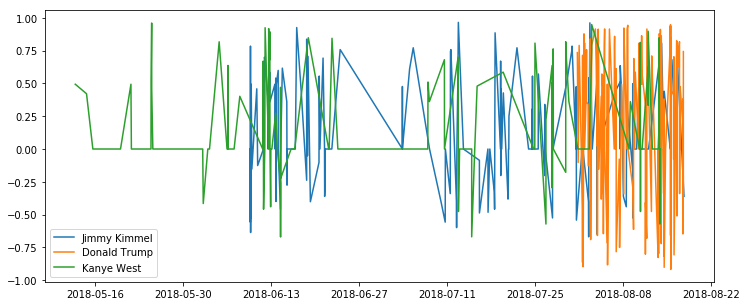

In [90]:
#sns.boxplot(fromjk.score)
#sns.boxplot(fromdt.score)
#sns.boxplot(fromk.score)



celebrities = pd.concat([fromjk, fromdt, fromk], sort=True)
names = ["Jimmy Kimmel", "Donald Trump", "Kanye West"]

#celebrities = celebrities.groupby('user_name')
display(celebrities.groupby(['user_name'])['score'].describe())

#daily = celebrities.resample("3D").mean()
#display(daily)
plt.figure(figsize=(12,5))
plt.plot(fromjk.score)
plt.plot(fromdt.score)
plt.plot(fromk.score)

#plt.boxplot(x=sixhours['score'])
plt.legend(loc='lower left')
plt.legend(labels=names)


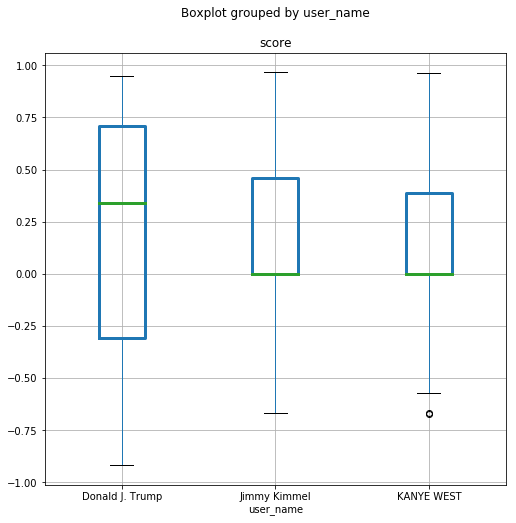

In [373]:
fig, ax = plt.subplots(figsize=(8,8))
plt.suptitle('')
boxprops = dict(linestyle='-', linewidth=3, color='k')
medianprops = dict(linestyle='-', linewidth=3, color='k')
celebrities.boxplot(column=['score'], by='user_name', ax=ax, boxprops=boxprops,
                medianprops=medianprops)

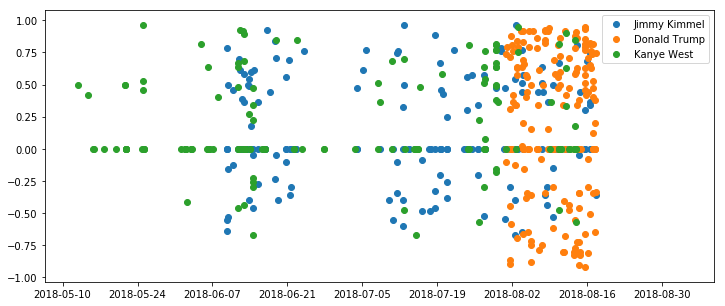

In [101]:
plt.figure(figsize=(12,5))
plt.scatter(x=fromjk.index, y= fromjk.score)
plt.scatter(x=fromdt.index, y=fromdt.score)
plt.scatter(x=fromk.index, y=fromk.score)

#plt.boxplot(x=sixhours['score'])
plt.legend(loc='lower left')
plt.legend(labels=names)
#plt.xlim('2018-07-30', '2018-08-18')

<BarContainer object of 3 artists>

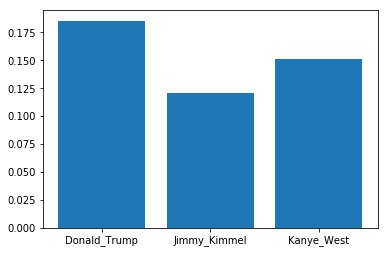

In [114]:
Donald_Trump= fromdt.score.mean()
Jimmy_Kimmel= fromjk.score.mean()
Kanye_West=fromk.score.mean()
means = [Donald_Trump, Jimmy_Kimmel, Kanye_West]
names = ["Donald_Trump", "Jimmy_Kimmel", "Kanye_West"]
plt.bar(names, means)

### Lets focus on tweets about Kanye

In [246]:
allkanye['score'] = pd.to_numeric(allkanye['score'])

In [129]:
kanye['score'] = pd.to_numeric(kanye['score'])
kanye.set_index('created_at', inplace=True)
kanye.index = pd.to_datetime(kanye.index)

kanyewest['score'] = pd.to_numeric(kanyewest['score'])
kanyewest.set_index('created_at', inplace=True)
kanyewest.index = pd.to_datetime(kanyewest.index)

                               id  retweet_count  favorite_count  \
created_at                                                         
2018-08-07 12:00:00  1.026842e+18       3.333333        0.000000   
2018-08-07 16:00:00  1.026889e+18       2.888889        0.814815   
2018-08-07 20:00:00  1.026949e+18       9.666667        0.777778   
2018-08-08 00:00:00  1.027005e+18       2.083333        0.166667   
2018-08-08 04:00:00  1.027062e+18       6.700000        0.300000   

                          user_id  user_followers_count  user_friends_count  \
created_at                                                                    
2018-08-07 12:00:00  4.428841e+17            398.666667          730.833333   
2018-08-07 16:00:00  3.295383e+17           3400.111111         2522.296296   
2018-08-07 20:00:00  3.741948e+17           8109.666667         6523.333333   
2018-08-08 00:00:00  3.246788e+17           1869.791667          941.208333   
2018-08-08 04:00:00  5.525325e+17            794.

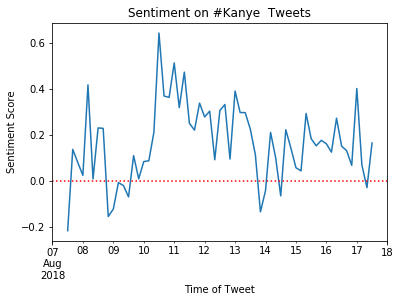

In [262]:
hourly = kanye.resample("4H").mean()
print(hourly.head())
hourly['score'].plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Sentiment on #Kanye  Tweets")

plt.axhline(y=0, color = 'red', linestyle = ':')

                     favorite_count  user_followers_count  user_friends_count  \
created_at                                                                      
2018-08-07 12:00:00             0.0                 395.0               443.5   
2018-08-07 16:00:00             0.0                 236.5               283.0   
2018-08-07 20:00:00             0.0                 278.0               345.5   
2018-08-08 00:00:00             0.0                 311.0               424.0   
2018-08-08 04:00:00             0.0                 243.0               439.5   

                       score  
created_at                    
2018-08-07 12:00:00 -0.13345  
2018-08-07 16:00:00  0.00000  
2018-08-07 20:00:00  0.01290  
2018-08-08 00:00:00  0.00000  
2018-08-08 04:00:00  0.54450  


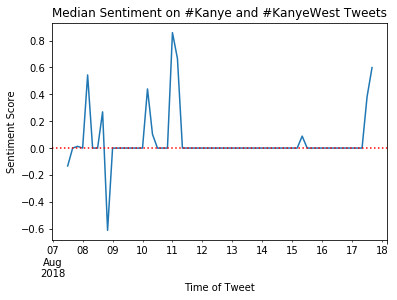

In [263]:
allkanye.index = pd.to_datetime(allkanye.index, errors='coerce')
hourly = allkanye.resample("4H").median()
print(hourly.head())
hourly['score'].plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Median Sentiment on #Kanye and #KanyeWest Tweets")

plt.axhline(y=0, color = 'red', linestyle = ':')

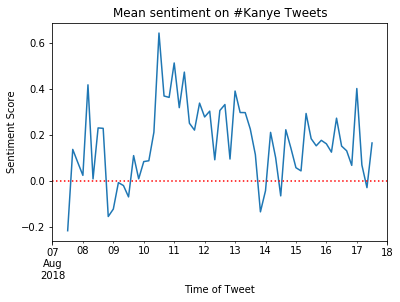

In [264]:
hkanye = kanye.resample("4H").mean()
hkanye['score'].plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Mean sentiment on #Kanye Tweets")

plt.axhline(y=0, color = 'red', linestyle = ':')

                     favorite_count  user_followers_count  user_friends_count  \
created_at                                                                      
2018-08-09 00:00:00       14.478992           3338.689076         1777.781513   
2018-08-09 04:00:00        0.225564           3478.293233          956.766917   
2018-08-09 08:00:00        0.071429           1484.214286          638.571429   
2018-08-09 12:00:00        1.285714          69218.350649         1889.662338   
2018-08-09 16:00:00       11.272727           4645.532468          933.545455   

                        score  
created_at                     
2018-08-09 00:00:00  0.024754  
2018-08-09 04:00:00  0.029665  
2018-08-09 08:00:00  0.030155  
2018-08-09 12:00:00  0.014535  
2018-08-09 16:00:00  0.158892  


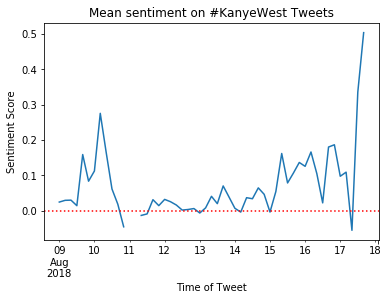

In [270]:
hwest = allwest.resample("4H").mean()
print(hwest.head())
hwest['score'].plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Mean sentiment on #KanyeWest Tweets")

plt.axhline(y=0, color = 'red', linestyle = ':')

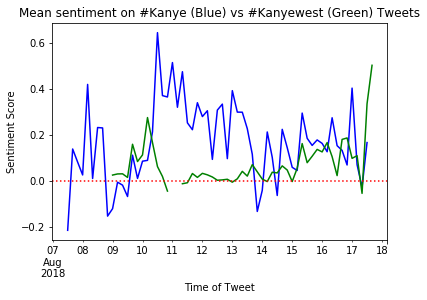

In [271]:
hkanye['score'].plot(color='blue')
hwest['score'].plot(color = 'green')
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Mean sentiment on #Kanye (Blue) vs #Kanyewest (Green) Tweets")

plt.axhline(y=0, color = 'red', linestyle = ':')

                     favorite_count  user_followers_count  user_friends_count  \
created_at                                                                      
2018-08-07 12:00:00        0.000000            398.666667          730.833333   
2018-08-07 16:00:00        0.846154           1628.961538          931.769231   
2018-08-07 20:00:00        0.812500            461.062500          559.437500   
2018-08-08 00:00:00        0.173913           1906.956522          941.739130   
2018-08-08 04:00:00        0.300000            794.000000          945.600000   

                        score  
created_at                     
2018-08-07 12:00:00 -0.215950  
2018-08-07 16:00:00  0.156681  
2018-08-07 20:00:00  0.112481  
2018-08-08 00:00:00  0.026357  
2018-08-08 04:00:00  0.419630  


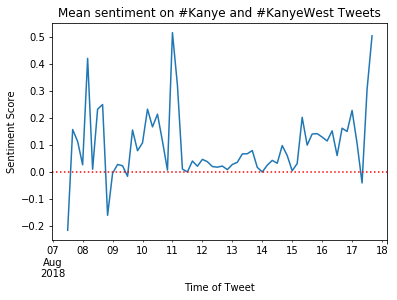

In [273]:
hall = allkanye.resample("4H").mean()
print(hall.head())
hall['score'].plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Mean sentiment on #Kanye and #KanyeWest Tweets")

plt.axhline(y=0, color = 'red', linestyle = ':')

### Number of tweets

created_at
2018-08-07 12:00:00    20
2018-08-07 18:00:00    31
2018-08-08 00:00:00    31
2018-08-08 06:00:00    11
2018-08-08 12:00:00    25
Freq: 6H, Name: text, dtype: int64


Text(0.5,1,'Number of #Kanye Tweets')

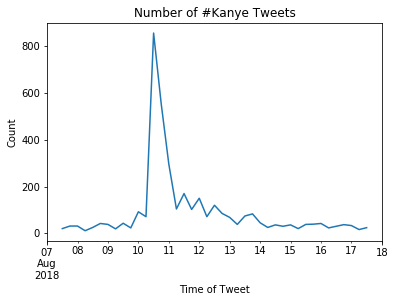

In [138]:
ckanye = kanye['text'].resample("6H").count()
print(ckanye.head())
ckanye.plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.title("Number of #Kanye Tweets")

created_at
2018-08-09 00:00:00    206
2018-08-09 06:00:00    102
2018-08-09 12:00:00    117
2018-08-09 18:00:00    112
2018-08-10 00:00:00    258
Name: text, dtype: int64


Text(0.5,1,'Number of #Kanyewest Tweets')

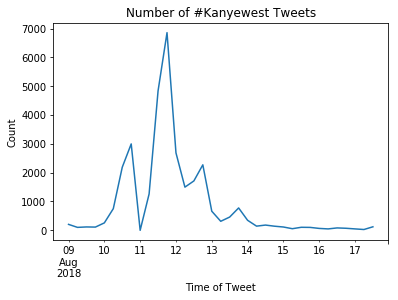

In [250]:
cwest = allwest['text'].resample("6H").count()
print(cwest.head())
cwest.plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.title("Number of #Kanyewest Tweets")

Text(0.5,1,'Number of #Kanye (blue) vs #Kanyewest (red) Tweets')

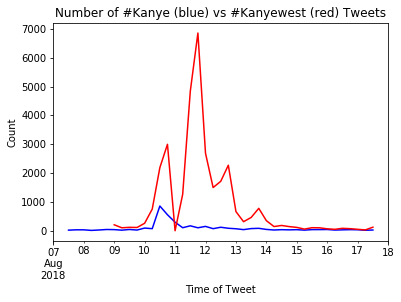

In [252]:
ckanye.plot(color='blue')
cwest.plot(color='red')
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.title("Number of #Kanye (blue) vs #Kanyewest (red) Tweets")

created_at
2018-06-09 12:00:00    9
2018-06-10 00:00:00    0
2018-06-10 12:00:00    2
2018-06-11 00:00:00    0
2018-06-11 12:00:00    2
Freq: 12H, Name: text, dtype: int64


Text(0.5,1,'Number of Tweets by Jimmy Kimmel')

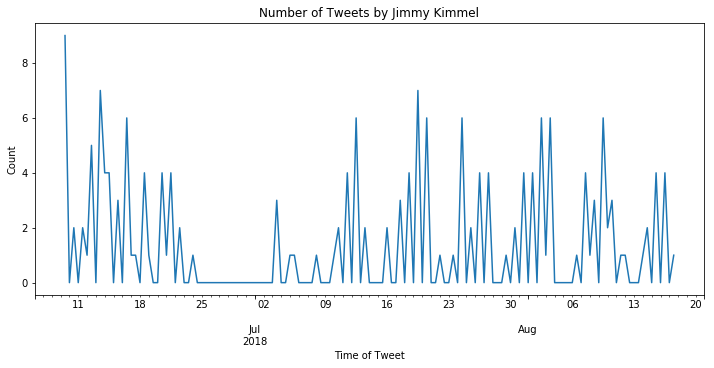

In [144]:
plt.figure(figsize=(12,5))
cjk = fromjk['text'].resample("12H").count()
print(cjk.head())
cjk.plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.title("Number of Tweets by Jimmy Kimmel")

In [156]:
print("Tweet: ", fromjk['text'][1])
print("Score: ",fromjk['score'][1])
print(fromjk.iloc[1,:])
display(fromjk.head(2))

Tweet:  An important message from your innocent friends at Apple 
Score:  0.743
id                                                    1030090458830008320
text                    An important message from your innocent friend...
retweet_count                                                         158
favorite_count                                                        708
source                                                       Media Studio
country                                                               NaN
user_id                                                          26053643
user_screen_name                                              jimmykimmel
user_name                                                    Jimmy Kimmel
user_created_at                                       2009-03-23 18:05:56
user_followers_count                                             11398250
user_friends_count                                                    600
user_location                   

,id,text,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
created_at,,,,,,,,,,,,,,
2018-08-17 16:39:00,1030494214042177536,"White people, space &amp; robots - three ridic...",25,140,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,-0.3612
2018-08-16 13:54:38,1030090458830008320,An important message from your innocent friend...,158,708,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.7430


In [160]:
print("Tweet: ", fromk['text'][1])
print("Score: ",fromk['score'][1])

print("Tweet: ", fromk['text'][0])
print("Score: ",fromk['score'][0])

print("Tweet: ", fromk['text'][2])
print("Score: ",fromk['score'][2])

print(fromk.iloc[1,:])
display(fromk.head(3))

Tweet:  deprogram
Score:  0.0
Tweet:  Yeezy slides on vacay 
Score:  0.0
Tweet:  we’re no longer fighting for change we’re simply changing things
Score:  -0.5719
id                      1029102613575348224
text                              deprogram
retweet_count                          5837
favorite_count                        26442
source                   Twitter for iPhone
country                                 NaN
user_id                           169686021
user_screen_name                  kanyewest
user_name                        KANYE WEST
user_created_at         2010-07-22 23:00:05
user_followers_count               28018750
user_friends_count                        8
user_location                           NaN
score                                     0
Name: 2018-08-13 20:29:17, dtype: object


,id,text,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
created_at,,,,,,,,,,,,,,
2018-08-13 22:18:50,1029130182978752513,Yeezy slides on vacay,4794,52506,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.0000
2018-08-13 20:29:17,1029102613575348224,deprogram,5837,26442,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.0000
2018-08-13 20:28:58,1029102535389237250,we’re no longer fighting for change we’re simp...,24937,98032,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,-0.5719


In [215]:
allwest = pd.read_csv('allwest.csv', engine='python')
allwest = allwest.iloc[:,1:]
display(allwest.head())

,id,text,created_at,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location
0,1030490164177645568,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:22:55,71,0.0,Twitter for iPhone,NaN,971279288849850368,mayne2x,Mayne Savage 👿,2018-03-07 07:00:02,42.0,62.0,"Burlington, NC"
1,1030490129679491074,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:22:47,71,0.0,Twitter for iPhone,NaN,3215026609,JussHindi,02.21🖤,2015-05-17 19:25:30,120.0,105.0,"Columbia, SC"
2,1030489957176098816,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:22:06,71,0.0,Twitter for Android,NaN,904635663101898752,KIDJermaine,R.I.G,2017-09-04 09:22:04,50.0,312.0,zero to hero
3,1030489820911554560,Tonight i will be live got big tunes from Dr...,2018-08-17 16:21:33,2,0.0,Twitter for Android,NaN,2709403443,HashTagLpool,HashTag Liverpool,2014-07-14 05:16:48,2427.0,1827.0,Liverpool (Level Nightclub)
4,1030489773641617409,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:21:22,71,0.0,Twitter for iPhone,NaN,529009939,RicoThePlugg,JussHEMM 💰💰🚶🏾‍♂️ ..,2012-03-19 01:45:18,301.0,445.0,🤷🏾‍♂️


In [219]:
allwest.set_index('id')
allwest['text'] = allwest['text'].astype(str)
score = []

for index, row in allwest.iterrows():
    tweet = row['text']
    ss = sid.polarity_scores(tweet)
    row['score'] = (ss['compound'])
    score.append(row['score'])
    
print(len(score))       
allwest['score'] = score

display(allwest.head())
display(allwest.describe())

31736


,id,text,created_at,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
0,1030490164177645568,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:22:55,71,0.0,Twitter for iPhone,NaN,971279288849850368,mayne2x,Mayne Savage 👿,2018-03-07 07:00:02,42.0,62.0,"Burlington, NC",0.5994
1,1030490129679491074,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:22:47,71,0.0,Twitter for iPhone,NaN,3215026609,JussHindi,02.21🖤,2015-05-17 19:25:30,120.0,105.0,"Columbia, SC",0.5994
2,1030489957176098816,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:22:06,71,0.0,Twitter for Android,NaN,904635663101898752,KIDJermaine,R.I.G,2017-09-04 09:22:04,50.0,312.0,zero to hero,0.5994
3,1030489820911554560,Tonight i will be live got big tunes from Dr...,2018-08-17 16:21:33,2,0.0,Twitter for Android,NaN,2709403443,HashTagLpool,HashTag Liverpool,2014-07-14 05:16:48,2427.0,1827.0,Liverpool (Level Nightclub),0.0000
4,1030489773641617409,Do YOU agree? 👇🏽\n shared his opinion on Kany...,2018-08-17 16:21:22,71,0.0,Twitter for iPhone,NaN,529009939,RicoThePlugg,JussHEMM 💰💰🚶🏾‍♂️ ..,2012-03-19 01:45:18,301.0,445.0,🤷🏾‍♂️,0.5994


,favorite_count,user_followers_count,user_friends_count,score
count,31731.000000,3.173100e+04,31731.000000,31736.000000
mean,2.677697,5.581823e+03,1237.056853,0.023186
std,370.989341,1.325279e+05,5569.236228,0.240212
min,0.000000,0.000000e+00,0.000000,-0.939400
25%,0.000000,1.840000e+02,203.000000,0.000000
50%,0.000000,4.360000e+02,415.000000,0.000000
75%,0.000000,1.054500e+03,905.000000,0.000000
max,65997.000000,6.127374e+06,422908.000000,0.962800


In [225]:
#allwest.set_index('created_at', inplace=True)
allwest.index = pd.to_datetime(allwest.index, errors='coerce')
display(allwest.describe())

,favorite_count,user_followers_count,user_friends_count,score
count,31731.000000,3.173100e+04,31731.000000,31736.000000
mean,2.677697,5.581823e+03,1237.056853,0.023186
std,370.989341,1.325279e+05,5569.236228,0.240212
min,0.000000,0.000000e+00,0.000000,-0.939400
25%,0.000000,1.840000e+02,203.000000,0.000000
50%,0.000000,4.360000e+02,415.000000,0.000000
75%,0.000000,1.054500e+03,905.000000,0.000000
max,65997.000000,6.127374e+06,422908.000000,0.962800


                     favorite_count  user_followers_count  user_friends_count  \
created_at                                                                      
2018-08-09 00:00:00        0.062500           3328.812500         1706.000000   
2018-08-09 01:00:00        0.000000           2591.400000         2174.000000   
2018-08-09 02:00:00        0.333333           7679.250000         9012.916667   
2018-08-09 03:00:00       19.976744           2778.313953          758.546512   
2018-08-09 04:00:00        0.057692            723.711538          777.538462   

                        score  
created_at                     
2018-08-09 00:00:00  0.283544  
2018-08-09 01:00:00  0.096240  
2018-08-09 02:00:00 -0.201333  
2018-08-09 03:00:00  0.003998  
2018-08-09 04:00:00  0.003658  


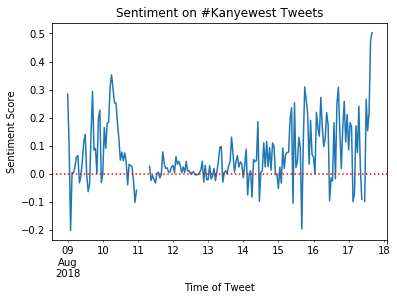

In [302]:
westhourly = allwest.resample("1H").mean()
print(westhourly.head())
westhourly['score'].plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Sentiment on #Kanyewest Tweets")

plt.axhline(y=0, color = 'red', linestyle = ':')

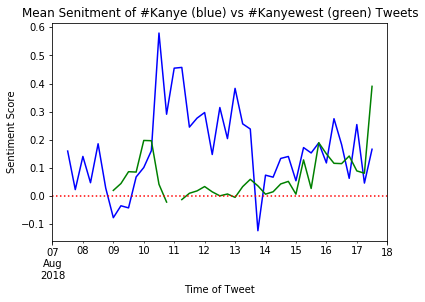

In [255]:
hkanye['score'].plot(color='blue')
westhourly['score'].plot(color='green')
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Mean Senitment of #Kanye (blue) vs #Kanyewest (green) Tweets")

plt.axhline(y=0, color = 'red', linestyle = ':')

created_at
2018-08-09 00:00:00     308
2018-08-09 12:00:00     229
2018-08-10 00:00:00    1009
2018-08-10 12:00:00    5185
2018-08-11 00:00:00    1262
Name: text, dtype: int64


Text(0.5,1,'Number of Tweets with #Kanyewest')

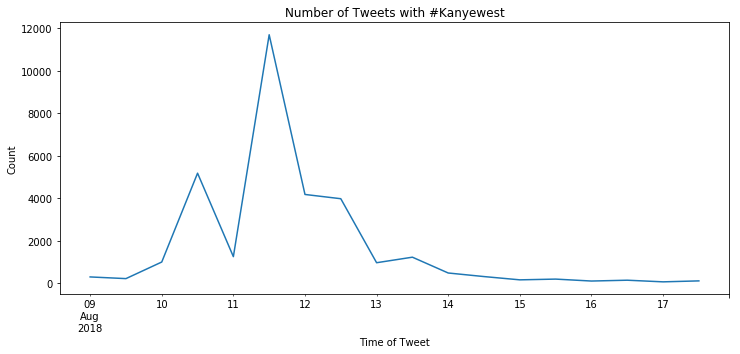

In [227]:
plt.figure(figsize=(12,5))
allwestc = allwest['text'].resample("12H").count()
print(allwestc.head())
allwestc.plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.title("Number of Tweets with #Kanyewest")

created_at
2018-08-07 00:00:00      20
2018-08-07 18:00:00      69
2018-08-08 12:00:00     306
2018-08-09 06:00:00     391
2018-08-10 00:00:00    4130
Name: text, dtype: int64


Text(0.5,1,'Number of Tweets with #Kanye or #Kanyewest')

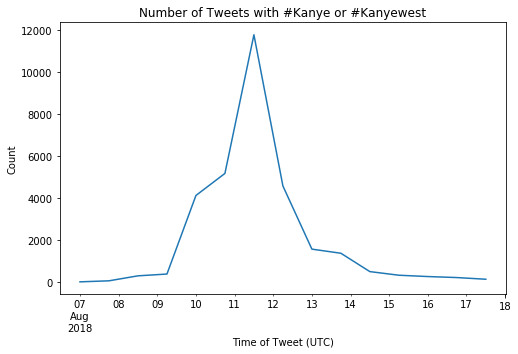

In [311]:
plt.figure(figsize=(8,5))
allkanyec = allkanye['text'].resample("18H").count()
print(allkanyec.head())
allkanyec.plot()
plt.xlabel('Time of Tweet (UTC)')
plt.ylabel('Count')
plt.title("Number of Tweets with #Kanye or #Kanyewest")

In [324]:
print(allkanye['source'].head(90))

created_at
2018-08-17 16:22:55     Twitter for iPhone
2018-08-17 16:22:47     Twitter for iPhone
2018-08-17 16:22:06    Twitter for Android
2018-08-17 16:21:33    Twitter for Android
2018-08-17 16:21:22     Twitter for iPhone
2018-08-17 16:21:01     Twitter for iPhone
2018-08-17 16:20:43     Twitter for iPhone
2018-08-17 16:20:41     Twitter for iPhone
2018-08-17 16:17:40     Twitter for iPhone
2018-08-17 16:17:39              Instagram
2018-08-17 16:17:19                dlvr.it
2018-08-17 16:15:50     Twitter for iPhone
2018-08-17 16:14:59    Twitter for Android
2018-08-17 16:14:35     Twitter for iPhone
2018-08-17 16:12:41     Twitter for iPhone
2018-08-17 16:12:35     Twitter for iPhone
2018-08-17 16:12:34     Twitter for iPhone
2018-08-17 16:12:29     Twitter for iPhone
2018-08-17 16:10:48           Twitter Lite
2018-08-17 16:10:23     Twitter for iPhone
2018-08-17 16:08:32    Twitter for Android
2018-08-17 16:07:13     Twitter for iPhone
2018-08-17 16:06:31    Twitter for Android


In [362]:
iphone = allkanye[allkanye['source']== 'Twitter for iPhone']
android = allkanye[allkanye['source']== 'Twitter for Android']
instagram = allkanye[allkanye['source']== 'Instagram']
web = allkanye[allkanye['source']== 'Twitter Web Client']
facebook = allkanye[allkanye['source']== 'Facebook']
hipster = allkanye[allkanye['source']== 'HipsterTweets']
twitterlite = allkanye[allkanye['source']== 'Twitter Lite']
ipad = allwest[allwest['source']== 'Twitter for iPad']
tweetdeck = allkanye[allkanye['source']== 'TweetDeck']
tweetsuite = allwest[allwest['source']== 'Tweet Suite']
blackberry = allwest[allwest['source']== 'Twitter for BlackBerry']
tumblr = allwest[allwest['source']== 'Tumblr']

X= (iphone['score'].mean(), android['score'].mean(), web['score'].mean(), twitterlite['score'].mean(),ipad['score'].mean(),instagram['score'].mean(),hipster['score'].mean(), tweetdeck['score'].mean())

print('iPhone mean score' , np.round(iphone['score'].mean(),2))
#print('iPhone score count' , iphone['score'].count())

print('Android mean score' , np.round(android['score'].mean(),2))
#print('Android score count' , android['score'].count())

print('Twitter Web User mean score' ,np.round(web['score'].mean(),2))
#print('Twitter Web User score count' , web['score'].count())

print('Twitter Lite mean score' , np.round(twitterlite['score'].mean(),2))
#print('Twitter Lite score count' , twitterlite['score'].count())

print('iPad mean score' , np.round(ipad['score'].mean(),2))
#print('iPad score count' , ipad['score'].count())

print('Instagram mean score' ,np.round(instagram['score'].mean(),2))
#print('Instagram score count' , instagram['score'].count())

print('HipsterTweets mean score' ,np.round(hipster['score'].mean(),2))
#print('HipsterTweets score count' , hipster['score'].count())

print('TweetDeck mean score', np.round(tweetdeck['score'].mean(),2))
#print('TweetDeck score count' , tweetdeck['score'].count())

iPhone mean score 0.04
Android mean score 0.06
Twitter Web User mean score 0.13
Twitter Lite mean score 0.13
iPad mean score -0.01
Instagram mean score 0.11
HipsterTweets mean score 0.21
TweetDeck mean score 0.08


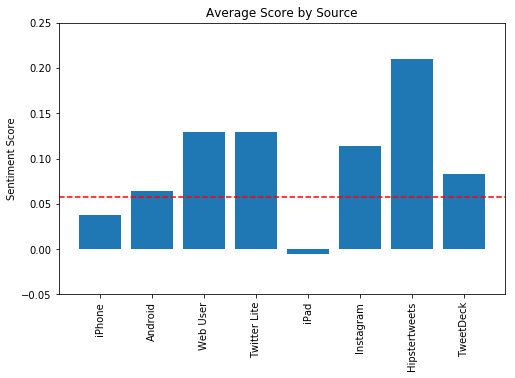

In [365]:
Y= (iphone['score'].mean(), android['score'].mean(), web['score'].mean(), twitterlite['score'].mean(),ipad['score'].mean(),instagram['score'].mean(),hipster['score'].mean(), tweetdeck['score'].mean())
X= ('iPhone', 'Android', 'Web User', 'Twitter Lite', 'iPad', 'Instagram', 'Hipstertweets', 'TweetDeck')
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.margins(0.05)

plt.bar(X, Y)
plt.ylim((-0.05, 0.25))

plt.ylabel('Sentiment Score')
plt.title("Average Score by Source")
plt.axhline(y=0.05783387, color = 'red', linestyle = '--')


In [364]:
print('Total mean score: ' , allkanye['score'].mean())

Total mean score:  0.05783387488268294


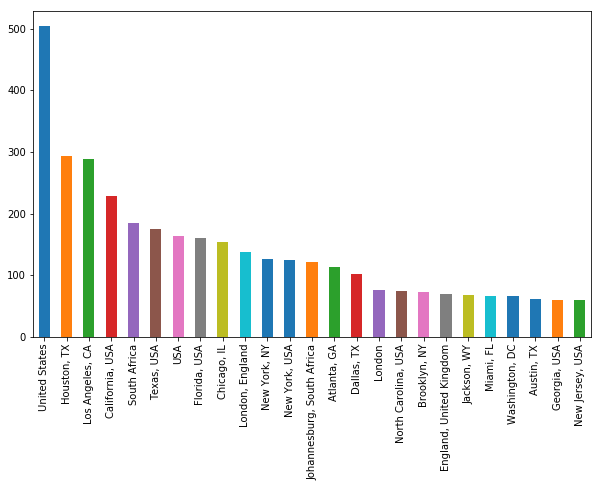

In [319]:
plt.figure(figsize=(10,6))
allkanye['user_location'].value_counts()[:25].plot(kind='bar')

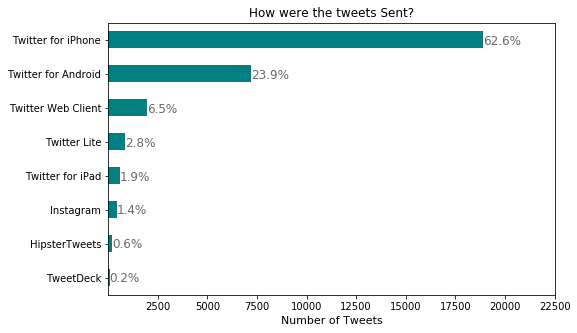

In [297]:
plt.figure(figsize=(8,5))
ax = allkanye['source'].value_counts()[:8].plot(kind='barh', color="teal")
ax.set_title("How were the tweets Sent?", fontsize=12)
ax.set_xlabel("Number of Tweets", fontsize=11);
ax.set_xticks([2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500])
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 1))+'%', fontsize=12,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

In [277]:
display(allkanye.corr())

,favorite_count,user_followers_count,user_friends_count,score
favorite_count,1.000000,0.003484,0.002410,-0.000345
user_followers_count,0.003484,1.000000,0.073182,0.005538
user_friends_count,0.002410,0.073182,1.000000,0.039965
score,-0.000345,0.005538,0.039965,1.000000


In [315]:
kanye_top_freq = allkanye.groupby(['text', 'score'])['text'].agg(
    {"code_count": len}).sort_values(
    "code_count", ascending=False).head(8).reset_index()

display(kanye_top_freq)
display(kanye_top_freq.text.iloc[0])
print('Score: ', kanye_top_freq.score.iloc[0])

display(kanye_top_freq.text.iloc[5])
print('Score: ', kanye_top_freq.score.iloc[5])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,text,score,code_count
0,KanyeWest tries to stand up for trump and Jim...,0.0000,19663
1,"""You can't bully me\nLiberals can't bully me\...",0.8595,1221
2,Let's Rock &amp; Roll Show \nKanye Patriot Lu...,0.0000,564
3,Kimmel is a good host... just take a break.. ...,0.4404,512
4,Kanye West Confirmed That The Left And The Ne...,-0.7964,463
5,The media: Black lives (and voices) matter.\n...,0.6114,357
6,7 YEARS AGO TODAY. jayz kanyewest throneshit,0.0000,282
7,northwest asked kimkardashian why she is famo...,0.0000,259


' KanyeWest tries to stand up for trump and JimmyKimmel shuts em up with facts. 🔥 '

Score:  0.0


' The media: Black lives (and voices) matter.\n\nAlso the media: Hahaha! We silenced a black man. \n\nJimmyKimmelLive Kany…'

Score:  0.6114
